# Project: Wrangling and Analyze Data

Data Gathering

In [1]:
#Import Libraries
import pandas as pd
import requests
import tweepy
import os
import json
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

- Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Load twitter- archive-enhanced Dataset
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#View twitter archive file as a df
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


 - Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# input your api keys
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
if api.verify_credentials() == False:
    print("The user credentials are invalid.")
else:
    print("The user credentials are valid.")

The user credentials are valid.


In [6]:
# use twitter archive tweet column to request data from twitter api
tweets = []
deleted_tweets=[]
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id,tweet_mode='extended')
        tweets.append(tweet)
    except:
        pass
    deleted_tweets.append(tweet_id)  

Rate limit reached. Sleeping for: 536
Rate limit reached. Sleeping for: 530


In [7]:
#copy the json file from data collected into a text file
json_file = []
for texts in tweets:
    json_file.append(texts._json)
    
with open('tweet_json.txt', 'w') as file:
    file.write(json.dumps(json_file,indent=4))


In [8]:
#create the dataframe for tweet id, retweet count and favorite count    
df_items = []
for i in json_file:
    tweets_id= i["id"]
    retweet_count= i['retweet_count']
    likes_count= i['favorite_count']
    df_items.append({'tweets_id': tweets_id,
                 'retweet_count': retweet_count,
                 'likes_count': likes_count})
                                                
# create count of tweets dataframe
tweet_df= pd.DataFrame(df_items)


In [9]:
#View count of tweets dataframe
tweet_df.tail(10)

,tweets_id,retweet_count,likes_count
2317,666058600524156928,47,99
2318,666057090499244032,112,247
2319,666055525042405380,196,367
2320,666051853826850816,704,1027
2321,666050758794694657,50,115
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112
2326,666020888022790149,423,2293


In [10]:
# save the tweets count as a csv file
tweet_df.to_csv('twitter_api.csv')

- Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [11]:
# create a folder for the image prediction file and get the files programatically using request library
folder_name= 'image_predictions.tsv'
if not os.path.exists(folder_name):
    os.mkdir(folder_name)

# get image prediction file from udacity server
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_prediction= requests.get(url)
image_prediction

<Response [200]>

In [12]:
# now let us get all the image prediction files
with open (os.path.join(folder_name, url.split('/')[-1]), mode= 'wb') as file:
    file.write(image_prediction.content)

In [7]:
# load image prediction file
image_prediction= pd.read_csv('image-predictions.tsv', sep= '\t')

In [15]:
#View image prediction
image_prediction.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1936,860184849394610176,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,1,chimpanzee,0.267612,False,gorilla,0.104293,False,orangutan,0.059908,False


### Assesing

> Visual Assesment
- More of it done with Excel

In [16]:
twitter_archive.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [17]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1238,712097430750289920,NaN,NaN,2016-03-22 02:03:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't even comprehend how confused this dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712097430...,10,10,None,None,None,None,None
410,823322678127919110,NaN,NaN,2017-01-23 00:13:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He's got the fastest paws in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/823322678...,11,10,Wyatt,None,None,None,None
1073,739932936087216128,NaN,NaN,2016-06-06 21:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Rorie. She's zen af. Just enjoyin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739932936...,10,10,Rorie,None,None,None,None
2220,668484198282485761,NaN,NaN,2015-11-22 17:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Good teamwork between these dogs. One is on lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668484198...,9,10,None,None,None,None,None
52,882045870035918850,NaN,NaN,2017-07-04 01:18:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Koko. Her owner, inspired by Barney, r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/882045870...,13,10,Koko,None,None,None,None


In [18]:
tweet_df

,tweets_id,retweet_count,likes_count
0,892420643555336193,7009,33810
1,892177421306343426,5301,29331
2,891815181378084864,3481,22050
3,891689557279858688,7225,36937
4,891327558926688256,7760,35311
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [19]:
tweet_df.sample(5)

,tweets_id,retweet_count,likes_count
1887,674307341513269249,6046,10158
185,855245323840757760,5269,0
401,822244816520155136,9235,33124
1129,724405726123311104,1515,4880
933,751132876104687617,1187,4730


In [20]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [21]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1527,788908386943430656,https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg,1,remote_control,0.881538,False,oscilloscope,0.035513,False,golden_retriever,0.034090,True
1558,793241302385262592,https://pbs.twimg.com/media/CwIougTWcAAMLyq.jpg,1,golden_retriever,0.559308,True,Labrador_retriever,0.390222,True,cocker_spaniel,0.036316,True
227,670374371102445568,https://pbs.twimg.com/media/CU2l7yvXAAUyYIJ.jpg,1,English_springer,0.974936,True,English_setter,0.011661,True,cocker_spaniel,0.002689,True
543,677269281705472000,https://pbs.twimg.com/media/CWYk0WxWoAAEwRt.jpg,1,Shetland_sheepdog,0.656616,True,collie,0.195405,True,German_shepherd,0.013103,True
363,672877615439593473,https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg,1,Chihuahua,0.412362,True,beagle,0.068066,True,borzoi,0.045071,True


> Programmatic assessment

In [22]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [23]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Clybe        1
Marvin       1
Flash        1
Cupid        1
Rodney       1
Name: name, Length: 957, dtype: int64

In [25]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [26]:
twitter_archive.isnull().sum(axis=0)


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [27]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweets_id      2327 non-null   int64
 1   retweet_count  2327 non-null   int64
 2   likes_count    2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [28]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issues

**Twitter Archive**
1. There are tweet ids that are of retweets.

2. These Columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` are not required for our analysis so we drop them.

3. `expanded_urls` has 59 null values (completeness issues)

4. Some entries in the `expanded Url` column has more than one urls in a them.(consistency issue)

5. a and None is used for dog name instead of NaN ( these are not valid names).

6. Timestamp has object as its data type as against datetime that it should be.
 
**Image Prediction**

7. image num column should be dropped as they are of no use in the analysis

8. Dog predictions that is False in `p1_dog`,` p2_dog`,` p3_dog` are not dog related and should be dropped.

### Tidiness issues
1. In `twitter archive` The dog stages doggo, pupper, puppo, and floofer should be in one column

2. All the data sets should be merged into one.

3. All duplicates and null values to be dropped. 

## Cleaning Data

In [131]:
tweet_df = pd.read_csv('twitter_api.csv')

In [132]:
# Make copies of original pieces of data
arch_clean = twitter_archive.copy()
tweet_clean = tweet_df.copy()
pred_clean = image_prediction.copy()

## Quality

### Issue #1:

#### Define:
- Drop rows that do not have null value in `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, we do not need it for the analysis.

#### Code

In [134]:
#Drop Retweets rows
arch_clean = arch_clean[arch_clean.retweeted_status_id.isnull()]
arch_clean = arch_clean[arch_clean.retweeted_status_user_id.isnull()]
arch_clean = arch_clean[arch_clean.retweeted_status_timestamp.isnull()]

#### Test

In [135]:
arch_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
480,815736392542261248,NaN,NaN,2017-01-02 01:48:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Akumi. It's his birthday. He received ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815736392...,11,10,Akumi,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
2316,666649482315059201,NaN,NaN,2015-11-17 16:09:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Cool dog. Enjoys couch. Low monotone bark. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666649482...,4,10,None,None,None,None,None
456,818259473185828864,NaN,NaN,2017-01-09 00:53:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Florence. He saw the same snap you sen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818259473...,12,10,Florence,None,None,None,None
1054,742423170473463808,NaN,NaN,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,None,None,None
2227,668268907921326080,NaN,NaN,2015-11-22 03:24:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an Azerbaijani Buttermilk named G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668268907...,10,10,None,None,None,None,None
2254,667782464991965184,NaN,NaN,2015-11-20 19:12:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Super rare dog. Endangered (?). Thinks it's fu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667782464...,9,10,None,None,None,None,None
1938,673906403526995968,NaN,NaN,2015-12-07 16:46:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys I'm getting real tired of this. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673906403...,3,10,None,None,None,None,None
952,751937170840121344,NaN,NaN,2016-07-10 00:32:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. Her ice cube is melting. She doe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751937170...,11,10,Ruby,None,None,None,None
1900,674664755118911488,NaN,NaN,2015-12-09 18:59:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rodman. He's getting destroyed by the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674664755...,10,10,Rodman,None,None,None,None


### Issue #2: 

#### Define:
- Drop the columns we do not need for the analysis in the archived tweets using the drop function

#### Code

In [136]:
arch_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1, inplace= True)

#### Test

In [137]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #3:

#### Define: 
- Drop Null values in the expanded_urls column

#### Code

In [138]:
arch_clean.isnull().sum(axis=0)

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         58
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

In [139]:
arch_clean = arch_clean.dropna()

#### Test

In [140]:
arch_clean.isnull().sum(axis=0)

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #4:

#### Define:
- We ‘explode’ the expanded_urls column, transforming each list-like to a separate row, by using explode(). This will replicate the index values from the original row then assign it to the twitter archive.

#### Code

In [141]:
#View expanded urls with more than one url
multi_urls = arch_clean[arch_clean['expanded_urls'].str.contains(',')] 
multi_urls


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
10,890006608113172480,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
13,889638837579907072,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2058,671347597085433856,2015-11-30 15:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She was not fully prepared for t...,https://twitter.com/dog_rates/status/671347597...,9,10,Lola,None,None,None,None
2073,670995969505435648,2015-11-29 16:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I can't handle this job anymore your dogs ...,https://twitter.com/dog_rates/status/670995969...,12,10,None,None,None,None,None
2084,670807719151067136,2015-11-29 03:33:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Andy. He can balance on one foot,...",https://twitter.com/dog_rates/status/670807719...,11,10,Andy,None,None,None,None
2205,668633411083464705,2015-11-23 03:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. He likes bagels. 10/10 https:...,https://twitter.com/dog_rates/status/668633411...,10,10,Churlie,None,None,None,None


In [142]:
#Creating a long form DataFrame using explode 
arch_clean = arch_clean.assign(expanded_urls=arch_clean.expanded_urls.str.split(",")).explode("expanded_urls")

#### Test

In [143]:
arch_clean[arch_clean['expanded_urls'].str.contains(',')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5:

#### Define:
- Replace invalid names with Nan

#### Code

In [144]:
arch_clean['name'].value_counts()

None       828
a           67
Cooper      19
Charlie     18
Oliver      17
          ... 
Jaycob       1
Bertson      1
Flash        1
Tino         1
Crouton      1
Name: name, Length: 956, dtype: int64

In [145]:
arch_clean[arch_clean.name.str.islower()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [146]:
arch_clean.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space', 'None'], np.nan, inplace=True)

#### Test

In [147]:
arch_clean.name.value_counts()

Cooper     19
Charlie    18
Oliver     17
Lola       15
Tucker     14
           ..
Gustav      1
Ralphé      1
Augie       1
Damon       1
Crouton     1
Name: name, Length: 930, dtype: int64

### Issue #6:

#### Define:
- Convert TimeStamp column Datatype to datetime

#### Code

In [148]:
# convert timestamp column to datetime data type
arch_clean['timestamp']= pd.to_datetime(arch_clean['timestamp'])

#### Test

In [149]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2975 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2975 non-null   int64              
 1   timestamp           2975 non-null   datetime64[ns, UTC]
 2   source              2975 non-null   object             
 3   text                2975 non-null   object             
 4   expanded_urls       2975 non-null   object             
 5   rating_numerator    2975 non-null   int64              
 6   rating_denominator  2975 non-null   int64              
 7   name                2022 non-null   object             
 8   doggo               2975 non-null   object             
 9   floofer             2975 non-null   object             
 10  pupper              2975 non-null   object             
 11  puppo               2975 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #7:

#### Define: 
- Drop the `img_num` column in **Image Prediction**

#### Code

In [150]:
pred_clean.drop('img_num', axis=1, inplace= True)

#### Test

In [151]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


### Issue #8:

#### Define: 
- Drop dog predictions that is False in p1_dog,p2_dog,p3_dog as they are not dog related.

#### Code

In [152]:
pred_clean['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [153]:
pred_clean['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [154]:
pred_clean['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [155]:
pred_clean.drop(pred_clean.index[pred_clean['p1_dog'] != True], inplace = True)

In [156]:
pred_clean.drop(pred_clean.index[pred_clean['p2_dog'] != True], inplace = True)

In [157]:
pred_clean.drop(pred_clean.index[pred_clean['p3_dog'] != True], inplace = True)

#### Test

In [158]:
pred_clean['p1_dog'].value_counts()

True    1243
Name: p1_dog, dtype: int64

In [159]:
pred_clean['p2_dog'].value_counts()

True    1243
Name: p2_dog, dtype: int64

In [160]:
pred_clean['p3_dog'].value_counts()

True    1243
Name: p3_dog, dtype: int64

## Tidiness

### Issue #1:

#### Define:
- Make the dog stages doggo, pupper, puppo, and floofer into one column using the melt function.

#### Code

In [161]:
arch_clean['doggo'].replace('None', np.nan, inplace=True)

In [162]:
arch_clean['floofer'].replace('None', np.nan, inplace=True)

In [163]:
arch_clean['pupper'].replace('None', np.nan, inplace=True)

In [164]:
arch_clean['puppo'].replace('None', np.nan, inplace=True)

In [165]:
variables =['doggo', 'floofer', 'pupper', 'puppo']
arch_clean['dog_stage'] = arch_clean[variables].apply(lambda x: ','.join(x.dropna().astype(str)),axis =1)

In [166]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2975 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2975 non-null   int64              
 1   timestamp           2975 non-null   datetime64[ns, UTC]
 2   source              2975 non-null   object             
 3   text                2975 non-null   object             
 4   expanded_urls       2975 non-null   object             
 5   rating_numerator    2975 non-null   int64              
 6   rating_denominator  2975 non-null   int64              
 7   name                2022 non-null   object             
 8   doggo               142 non-null    object             
 9   floofer             15 non-null     object             
 10  pupper              324 non-null    object             
 11  puppo               43 non-null     object             
 12  dog_stage           2975 non-null 

In [167]:
#Drop the doggo, floofer, pupper, puppo
arch_clean = arch_clean.drop(columns = variables, axis =1)

In [168]:
#Convert the datatype of the dog stage to categorical data
arch_clean['dog_stage']= arch_clean.dog_stage.astype('category')

#### Test

In [169]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2975 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2975 non-null   int64              
 1   timestamp           2975 non-null   datetime64[ns, UTC]
 2   source              2975 non-null   object             
 3   text                2975 non-null   object             
 4   expanded_urls       2975 non-null   object             
 5   rating_numerator    2975 non-null   int64              
 6   rating_denominator  2975 non-null   int64              
 7   name                2022 non-null   object             
 8   dog_stage           2975 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 212.5+ KB


In [170]:
arch_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1330,705786532653883392,2016-03-04 16:06:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Seriously, add us 🐶 11/10 for sad wet pupper h...",https://twitter.com/dog_rates/status/705786532...,11,10,NaN,pupper
915,757354760399941633,2016-07-24 23:20:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Devón (pronounced ""Eric""). He forgot h...",https://twitter.com/dog_rates/status/757354760...,8,10,Devón,
318,834574053763584002,2017-02-23 01:22:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo fully pupared for a shower. H*c...,https://twitter.com/dog_rates/status/834574053...,13,10,NaN,doggo
1900,674664755118911488,2015-12-09 18:59:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rodman. He's getting destroyed by the ...,https://twitter.com/dog_rates/status/674664755...,10,10,Rodman,
1321,706310011488698368,2016-03-06 02:46:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very sleepy pupper. Thinks it's an ai...,https://twitter.com/dog_rates/status/706310011...,12,10,NaN,pupper
533,807621403335917568,2016-12-10 16:22:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ollie Vue. He was a 3 legged pupper on...,https://twitter.com/dog_rates/status/807621403...,14,10,Ollie,pupper
1547,689280876073582592,2016-01-19 02:59:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Herald. He wants you to know he could ...,https://twitter.com/dog_rates/status/689280876...,10,10,Herald,
894,759197388317847553,2016-07-30 01:22:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. She's just heckin precious af I ...,https://twitter.com/dog_rates/status/759197388...,12,10,Luna,
1441,696877980375769088,2016-02-09 02:07:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She's in a predicament. Not sur...,https://twitter.com/dog_rates/status/696877980...,9,10,Misty,pupper
1419,698342080612007937,2016-02-13 03:05:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Maximus. He's training for the tetherb...,https://twitter.com/dog_rates/status/698342080...,11,10,Maximus,


### Issue #2:

#### Define:
- Merge all DataFrame into 1 tidy data

#### Code

In [171]:
df1 = pd.merge(arch_clean, pred_clean, on= 'tweet_id')

In [172]:
#change tweets_id column in tweet_clean df to tweet_id
tweet_clean = tweet_clean.rename(columns={"tweets_id":"tweet_id"})

In [173]:
tidy_data= pd.merge(df1, tweet_clean, on = 'tweet_id')

#### Test

In [174]:
tidy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1787 entries, 0 to 1786
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1787 non-null   int64              
 1   timestamp           1787 non-null   datetime64[ns, UTC]
 2   source              1787 non-null   object             
 3   text                1787 non-null   object             
 4   expanded_urls       1787 non-null   object             
 5   rating_numerator    1787 non-null   int64              
 6   rating_denominator  1787 non-null   int64              
 7   name                1283 non-null   object             
 8   dog_stage           1787 non-null   category           
 9   jpg_url             1787 non-null   object             
 10  p1                  1787 non-null   object             
 11  p1_conf             1787 non-null   float64            
 12  p1_dog              1787 non-null 

### Issue #3:

#### Define:
- Drop Duplicates and Null data

#### Code

In [175]:
(tidy_data.duplicated().sum())

568

In [176]:
tidy_data.drop_duplicates(inplace=True)

In [177]:
#view null values
tidy_data.isnull().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls           0
rating_numerator        0
rating_denominator      0
name                  355
dog_stage               0
jpg_url                 0
p1                      0
p1_conf                 0
p1_dog                  0
p2                      0
p2_conf                 0
p2_dog                  0
p3                      0
p3_conf                 0
p3_dog                  0
Unnamed: 0              0
retweet_count           0
likes_count             0
dtype: int64

In [178]:
#Drop Nulls
tidy_data.dropna(inplace=True)


#### Test

In [179]:
(tidy_data.duplicated().sum())

0

In [180]:
tidy_data.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
dog_stage             0
jpg_url               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
Unnamed: 0            0
retweet_count         0
likes_count           0
dtype: int64

In [181]:
tidy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 0 to 1765
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            864 non-null    int64              
 1   timestamp           864 non-null    datetime64[ns, UTC]
 2   source              864 non-null    object             
 3   text                864 non-null    object             
 4   expanded_urls       864 non-null    object             
 5   rating_numerator    864 non-null    int64              
 6   rating_denominator  864 non-null    int64              
 7   name                864 non-null    object             
 8   dog_stage           864 non-null    category           
 9   jpg_url             864 non-null    object             
 10  p1                  864 non-null    object             
 11  p1_conf             864 non-null    float64            
 12  p1_dog              864 non-null   

#### Store Data

In [182]:
tidy_data.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data

#### Questions 

1. What name is the top 5 most Common?
2. What are the details of the dog with the least rating numerator?
3. Is there a correlation between the Rating numerator and the likes(favourite) count?
4. What is the least common Dog stage in the data set?
5. What is the frequency of Dog Ratings?

In [183]:
df = tidy_data

In [191]:
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,retweet_count,likes_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,1,5301,29331
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,2,3481,22050
2,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,4,7760,35311
6,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,8,3620,24522
7,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,9,6098,27959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,666691418707132416,2015-11-17 18:56:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,https://twitter.com/dog_rates/status/666691418...,8,10,Christoper,,https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg,...,True,beagle,0.008687,True,bloodhound,0.005394,True,2286,42,161
1759,666644823164719104,2015-11-17 15:51:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He is a Botwanian Gouda. Can ...,https://twitter.com/dog_rates/status/666644823...,9,10,Jimothy,,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,...,True,Pembroke,0.043209,True,West_Highland_white_terrier,0.038906,True,2288,69,208
1760,666454714377183233,2015-11-17 03:16:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I'll name the dogs from now on. This is Kreggo...,https://twitter.com/dog_rates/status/666454714...,10,10,Kreggory,,https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg,...,True,Labrador_retriever,0.237612,True,Great_Pyrenees,0.171106,True,2289,179,448
1761,666447344410484738,2015-11-17 02:46:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,https://twitter.com/dog_rates/status/666447344...,9,10,Scout,,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,...,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True,2290,19,90


In [200]:
df.shape

(864, 22)

<a id='eda'></a>
## Exploratory Data Analysis

> Let's explore the clean and suitable dataset which is now ready for analysis!



<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


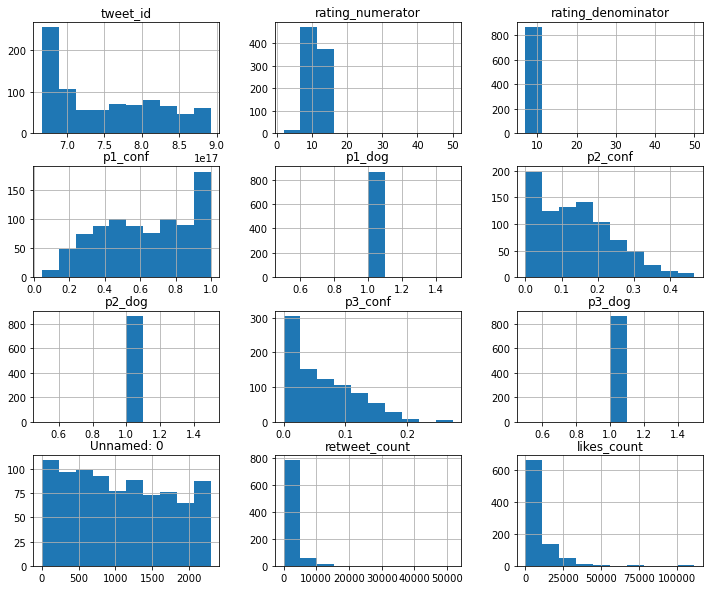

In [184]:
#Basic Exploration
df.hist(figsize=[12, 10]);

### Research Question 1: What  is the 5 most common dog \name?

In [185]:
#Get Number of unique names
df.name.nunique()

629

In [186]:
df['name'].value_counts().nlargest(5)

Cooper     10
Oliver      8
Charlie     7
Sadie       6
Koda        6
Name: name, dtype: int64

> Observation:There are 627 unique names but Cooper, Oliver, Charlie, Sadie, Koda are the 5 most common names in the data set. 

### Research Question 2: What are the details of the dog with the least rating numerator?

In [193]:
idx=df.rating_numerator.idxmin()
df.loc[idx]

tweet_id                                             678424312106393600
timestamp                                     2015-12-20 03:58:55+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Crystal. She's a shitty fireman. No se...
expanded_urls         https://twitter.com/dog_rates/status/678424312...
rating_numerator                                                      2
rating_denominator                                                   10
name                                                            Crystal
dog_stage                                                              
jpg_url                 https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg
p1                                                          Maltese_dog
p1_conf                                                        0.759945
p1_dog                                                             True
p2                                                           toy

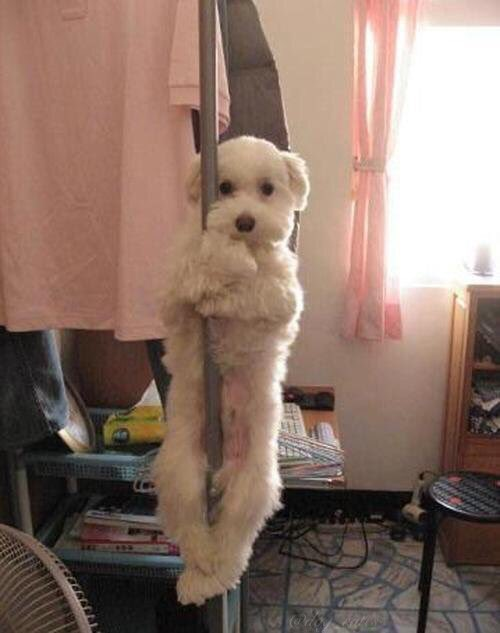

In [199]:
crystal = df.jpg_url[1452]
display.Image(crystal)

> Observation: The dog is named Crystal, the dog had 2281 retweets and 5006 likes.It is the only dog with that rating numerator of 2.

### Research Question 3: Is there a correlation between the Rating numerator and the likes(favorite) count?

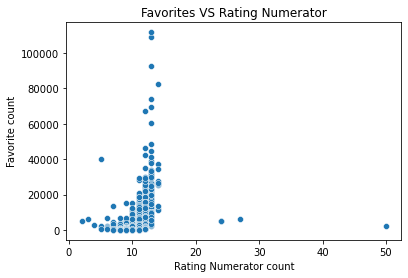

In [188]:
# Scatter plot to show the relation between Rating numerator and Likes
ax = sns.scatterplot(x='rating_numerator', y='likes_count', data=df) 
ax.set(xlabel='Rating Numerator count', ylabel='Favorite count', title='Favorites VS Rating Numerator')
plt.show()

> Observation: There is a weak positive correlation with outliers.

### Research Question 4: What is the least common Dog stage in the data set?

In [189]:
df.groupby('dog_stage').count()['tweet_id'].nsmallest(5)

dog_stage
doggo,floofer     0
doggo,puppo       0
doggo,pupper      3
floofer           4
puppo            15
Name: tweet_id, dtype: int64

> The least common dog stage is the Floofer 

### Research Question 4: What is the frequency of Dog Ratings?

Text(0, 0.5, 'Ratings')

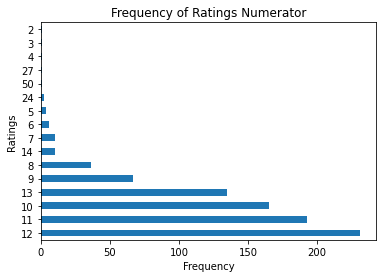

In [195]:
df.rating_numerator.value_counts().plot(kind='barh');
plt.title('Frequency of Ratings Numerator')
plt.xlabel('Frequency')
plt.ylabel('RatingS')

> Most Dogs had the rating of 12